In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Latex
from sympy import * 
from iminuit import Minuit
import seaborn as sns
import pandas as pd
import scipy as sp
import sys                                             # Modules to see files and folders in directories
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure
from scipy.stats import binom, poisson, norm
from simple_pendulum_functions import Residual_time
from Universal_functions import weighted_mean,uncertainty_weighted

In [2]:

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [3]:
Tan=np.loadtxt("../data/pendulum/timer_output1_tan.dat")
Michael1=np.loadtxt("../data/pendulum/trash_data_Michael.dat")
Michael2=np.loadtxt("../data/pendulum/better_data_Michael.dat")
Chris=np.loadtxt("../data/pendulum/chris_data_0.dat")
Luca=np.loadtxt("../data/pendulum/timer_output_luca.dat")

In [4]:
def fit_function_Lin(x, slope, intercept):
    return intercept + slope*x

In [5]:
Time_lib={"Tan":Tan[1:,1],"Michael1":Michael1[:,1]-min(Michael1[:,1]),"Michael2":Michael2[1:51,1],"Chris":Chris[:,1],"Luca":Luca[:,1]}
Number_lib={"Tan":Tan[1:,0],"Michael1":Michael1[:,0],"Michael2":Michael2[1:51,0],"Chris":Chris[:,0],"Luca":Luca[:,0]}
Time=pd.DataFrame(Time_lib)
Number=pd.DataFrame(Number_lib)
print(len(Number_lib))

5


In [6]:
chi2_object_Tan = Chi2Regression(fit_function_Lin, Number.Tan,Time.Tan, Time.Michael1.std()) 
chi2_object_Michael1  = Chi2Regression(fit_function_Lin, Number.Michael1,Time.Michael1, Time.Michael1.std()) 
chi2_object_Michael2  = Chi2Regression(fit_function_Lin, Number.Michael2,Time.Michael2, Time.Michael2.std())
chi2_object_Luca  = Chi2Regression(fit_function_Lin, Number.Luca,Time.Luca, Time.Luca.std()) 
chi2_object_Chris  = Chi2Regression(fit_function_Lin, Number.Chris,Time.Chris, Time.Chris.std()) 
minuitLin_Tan = Minuit(chi2_object_Tan, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Michael1 = Minuit(chi2_object_Michael1, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Michael2 = Minuit(chi2_object_Michael2, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Luca = Minuit(chi2_object_Luca, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Chris = Minuit(chi2_object_Chris, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Tan.migrad();
minuitLin_Michael1.migrad(); 
minuitLin_Michael2.migrad(); 
minuitLin_Luca.migrad(); 
minuitLin_Chris.migrad(); 

In [7]:
Time_Tan_std=np.array(fit_function_Lin(Number.Tan,minuitLin_Tan.args[0],minuitLin_Tan.args[1])-Time.Tan).std()
Time_Luca_std=np.array(fit_function_Lin(Number.Luca,minuitLin_Luca.args[0],minuitLin_Luca.args[1])-Time.Luca).std()
Time_Michael2_std=np.array(fit_function_Lin(Number.Michael2,minuitLin_Michael2.args[0],minuitLin_Michael2.args[1])-Time.Michael2).std()
Time_Chris_std=np.array(fit_function_Lin(Number.Chris,minuitLin_Chris.args[0],minuitLin_Chris.args[1])-Time.Chris).std()

In [8]:
chi2_object_Tan = Chi2Regression(fit_function_Lin, Number.Tan,Time.Tan, Time_Tan_std) 
chi2_object_Michael2  = Chi2Regression(fit_function_Lin, Number.Michael2,Time.Michael2, Time_Michael2_std)
chi2_object_Luca  = Chi2Regression(fit_function_Lin, Number.Luca,Time.Luca, Time_Luca_std) 
chi2_object_Chris  = Chi2Regression(fit_function_Lin, Number.Chris,Time.Chris, Time_Chris_std) 
minuitLin_Tan = Minuit(chi2_object_Tan, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Michael2 = Minuit(chi2_object_Michael2, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Luca = Minuit(chi2_object_Luca, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Chris = Minuit(chi2_object_Chris, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Tan.migrad();
minuitLin_Michael1.migrad(); 
minuitLin_Michael2.migrad(); 
minuitLin_Luca.migrad(); 
minuitLin_Chris.migrad(); 

In [9]:
NpointsLin = 50 - 2 # 3 parameters in fit
Chi2Lin=minuitLin_Luca.fval 
Prob_gau = sp.stats.chi2.sf(Chi2Lin, NpointsLin) 
print(Prob_gau,Chi2Lin)

0.3938755170882758 50.00000000000021


In [10]:
def Residual_periode(periode,Number,Time):
    return periode-Time/Number

In [11]:
Tan,Chris,Luca,Michael2,Michael1=np.array([minuitLin_Tan.args[0],minuitLin_Tan.errors[0]]),np.array([minuitLin_Chris.args[0],minuitLin_Chris.errors[0]]),np.array([minuitLin_Luca.args[0],minuitLin_Luca.errors[0]]),np.array([minuitLin_Michael2.args[0],minuitLin_Michael2.errors[0]]),np.array([minuitLin_Michael1.args[0],minuitLin_Michael1.errors[0]])

In [12]:
def sigma(x1,x2):
    distance=abs(x1[0]-x2[0])/(x1[1]+x2[1])
    return distance

In [15]:
print(Michael1,Michael2,Luca,Tan,Chris)

[1.38281757 0.19754611] [1.38395277e+00 4.00587417e-04] [1.38547758e+00 5.91601677e-04] [1.38541762e+00 8.55731873e-04] [1.38651808e+00 7.17831174e-04]


In [22]:
distance_Tan_michael=sigma(Tan,Michael2)
distance_Tan_Chris=sigma(Tan,Chris)
distance_Tan_Luca=sigma(Tan,Luca)
print(distance_Tan_michael,distance_Tan_Chris,distance_Tan_Luca)
distance_Luca_michael=sigma(Luca,Michael2)
distance_Luca_Chris=sigma(Luca,Chris)
print(distance_Luca_michael,distance_Luca_Chris)
distance_Chris_michael=sigma(Chris,Michael2)
print(distance_Chris_michael)
distance_Michael_michael1=sigma(Michael2,Michael1)
print(distance_Michael_michael1)


1.165981569907511 0.6993434336535 0.041432319817574274
1.536815445272615 0.7946147043142133
2.29369052110636
0.005734891677363274


In [17]:
Time_Tan_std=np.array(fit_function_Lin(Number.Tan,minuitLin_Tan.args[0],minuitLin_Tan.args[1])-Time.Tan)
Time_Luca_std=np.array(fit_function_Lin(Number.Luca,minuitLin_Luca.args[0],minuitLin_Luca.args[1])-Time.Luca)
Time_Michael2_std=np.array(fit_function_Lin(Number.Michael2,minuitLin_Michael2.args[0],minuitLin_Michael2.args[1])-Time.Michael2)
Time_Chris_std=np.array(fit_function_Lin(Number.Chris,minuitLin_Chris.args[0],minuitLin_Chris.args[1])-Time.Chris)

In [18]:
y_Tan=sp.stats.norm(Time_Tan_std.mean(), Time_Tan_std.std())
x_Tan=np.linspace(-max(abs(Time_Tan_std)+0.1),max(abs(Time_Tan_std)+0.1),100)
y_Luca=sp.stats.norm(Time_Luca_std.mean(), Time_Luca_std.std())
x_Luca=np.linspace(-max(abs(Time_Luca_std)+0.1),max(abs(Time_Luca_std)+0.1),100)
y_Michael2=sp.stats.norm(Time_Michael2_std.mean(), Time_Michael2_std.std())
x_Michael2=np.linspace(-max(abs(Time_Michael2_std)+0.1),max(abs(Time_Michael2_std)+0.1),100)
y_Chris=sp.stats.norm(Time_Chris_std.mean(), Time_Chris_std.std())
x_Chris=np.linspace(-max(abs(Time_Chris_std)+0.1),max(abs(Time_Chris_std)+0.1),100)

In [24]:
T1=weighted_mean(np.array([minuitLin_Tan.args[0],minuitLin_Luca.args[0],minuitLin_Michael2.args[0],minuitLin_Chris.args[0]]),np.array([minuitLin_Tan.errors[0],minuitLin_Luca.errors[0],minuitLin_Michael2.errors[0],minuitLin_Chris.errors[0]]))


In [25]:
T_std=uncertainty_weighted(np.array([minuitLin_Tan.errors[0],minuitLin_Luca.errors[0],minuitLin_Chris.errors[0],minuitLin_Michael2.errors[0]]))

In [26]:
T_std_retime=np.mean(np.array([Time_Luca_std.std(),Time_Michael2_std.std(),Time_Tan_std.std(),Time_Chris_std.std()]))
print(T_std_retime)

0.06545339921835441


In [27]:
T2=weighted_mean(np.array([minuitLin_Tan.args[0],minuitLin_Luca.args[0],minuitLin_Michael2.args[0],minuitLin_Chris.args[0]]),np.array([Time_Luca_std.std(),Time_Michael2_std.std(),Time_Tan_std.std(),Time_Chris_std.std()]))

In [28]:
print(1.9183149350649353*(2*np.pi/(T2*2))**2)

9.86353293016141


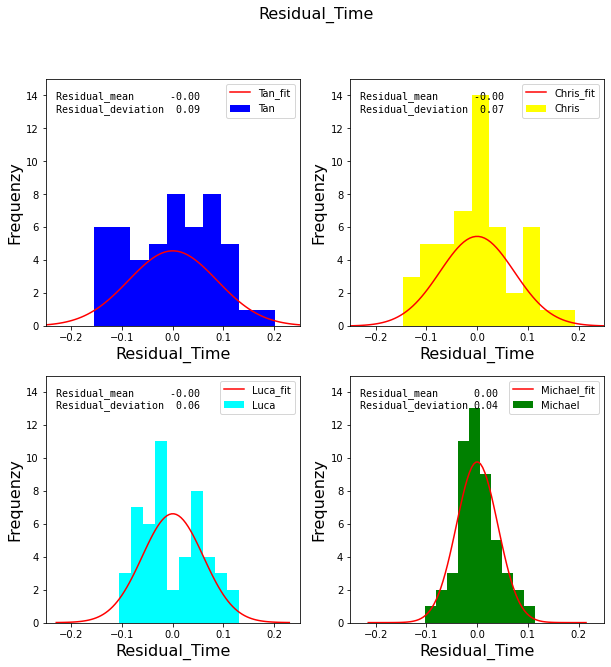

In [48]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].hist(Time_Tan_std,color="blue",label="Tan")
ax[0,0].plot(x_Tan,y_Tan.pdf(x_Tan),'r',label="Tan_fit")
ax[1,0].hist(Time_Luca_std,color="cyan",label="Luca")
ax[1,0].plot(x_Luca,y_Luca.pdf(x_Luca),color="red",label="Luca_fit")
ax[1,1].hist(Time_Michael2_std,color="green",label="Michael")
ax[1,1].plot(x_Michael2,y_Michael2.pdf(x_Michael2),color="red",label="Michael_fit")
ax[0,1].hist(Time_Chris_std,color="yellow",label="Chris")
ax[0,1].plot(x_Chris,y_Chris.pdf(x_Chris),'red',label="Chris_fit")
fig.suptitle('This is a somewhat long figure title', fontsize=16)
ax[1,1].set_xlim(-0.25,0.25)
ax[0,0].set_xlim(-0.25,0.25)
ax[1,0].set_xlim(-0.25,0.25)
ax[0,1].set_xlim(-0.25,0.25)
ax[1,1].set_ylim(0,15)
ax[0,0].set_ylim(0,15)
ax[1,0].set_ylim(0,15)
ax[0,1].set_ylim(0,15)
ax[1,1].legend()
ax[0,0].legend()
ax[1,0].legend()
ax[0,1].legend()
ax[1,1].set_xlabel("Residual_Time",fontsize=16)
ax[0,0].set_xlabel("Residual_Time",fontsize=16)
ax[1,0].set_xlabel("Residual_Time",fontsize=16)
ax[0,1].set_xlabel("Residual_Time",fontsize=16)
ax[1,1].set_ylabel("Frequenzy",fontsize=16)
ax[0,0].set_ylabel("Frequenzy",fontsize=16)
ax[1,0].set_ylabel("Frequenzy",fontsize=16)
ax[0,1].set_ylabel("Frequenzy",fontsize=16)
d = {'Residual_mean':Time_Tan_std.mean(),'Residual_deviation':Time_Tan_std.std()}
text = nice_string_output(d, extra_spacing=1, decimals=2)
add_text_to_ax(0.04, 0.95, text, ax[0,0], fontsize=10)
d1 = {'Residual_mean':Time_Chris_std.mean(),'Residual_deviation':Time_Chris_std.std()}
text = nice_string_output(d1, extra_spacing=1, decimals=2)
add_text_to_ax(0.04, 0.95, text, ax[0,1], fontsize=10)
d2 = {'Residual_mean':Time_Luca_std.mean(),'Residual_deviation':Time_Luca_std.std()}
text = nice_string_output(d2, extra_spacing=1, decimals=2)
add_text_to_ax(0.04, 0.95, text, ax[1,0], fontsize=10)
d3 = {'Residual_mean':Time_Michael2_std.mean(),'Residual_deviation':Time_Michael2_std.std()}
text = nice_string_output(d3, extra_spacing=1, decimals=2)
add_text_to_ax(0.04, 0.95, text, ax[1,1], fontsize=10)
fig.suptitle('Residual_Time', fontsize=16)
fig.savefig("Residualplots")

In [33]:
combined=np.block([Time_Tan_std,Time_Luca_std,Time_Michael2_std,Time_Chris_std])
y_combined=sp.stats.norm(combined.mean(), combined.std())
x_combined=np.linspace(-max(abs(combined)),max(abs(combined)),100)

In [46]:
print(np.std(combined),np.mean(combined))


0.06764871906943909 -2.0474433259920488e-12


In [34]:
x=np.linspace(0,50,50+1)

In [35]:
T_std_Tan=sum(Time_Tan_std**2/(len(Time_Tan_std)))
T_std_Luca=sum(Time_Luca_std**2/(len(Time_Luca_std)))
T_std_Chris=sum(Time_Chris_std**2/(len(Time_Chris_std)))
T_std_Michael2=sum(Time_Michael2_std**2/(len(Time_Michael2_std)))
print(np.mean([T_std_Tan,T_std_Luca,T_std_Chris,T_std_Michael2]))
print(T_std_Luca,Time_Luca_std.std(),Time_Tan_std.std(),Time_Michael2_std.std(),
Time_Michael2_std.std()

SyntaxError: unexpected EOF while parsing (<ipython-input-35-e91768f39a54>, line 7)

<ipython-input-49-e5acaf76aaa6>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


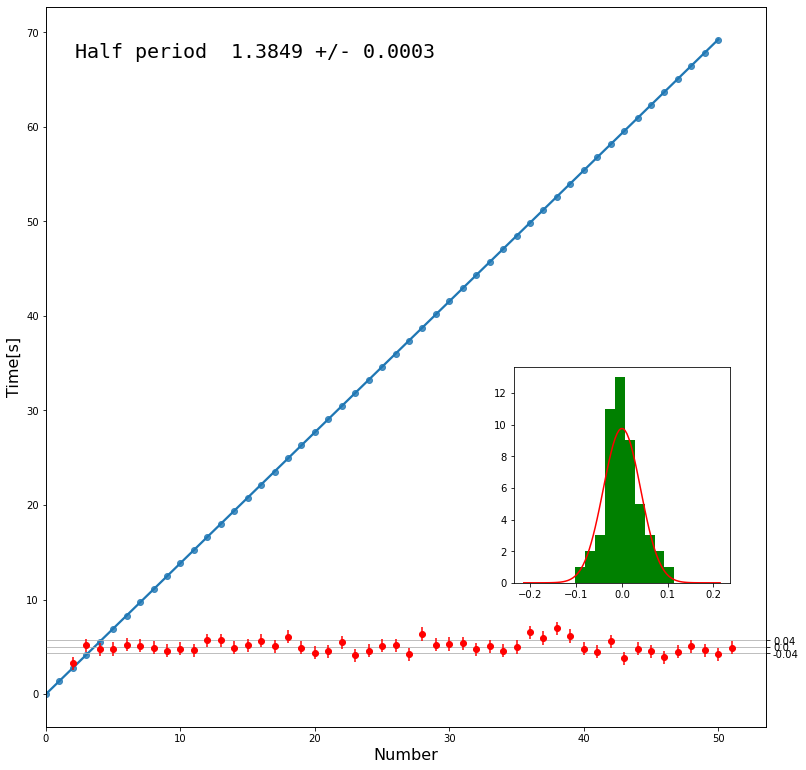

In [49]:

fig=plt.figure(figsize=(10,10))
ax=fig.add_axes([0,0,1,1])
#sns.FacetGrid(weighted_mean_Time)
ax1=fig.add_axes([0.65,0.2,0.3,0.3])

ax2 = ax.twinx()
ax1.hist(Time_Michael2_std,color="green")
ax1.plot(x_Michael2,y_Michael2.pdf(x_Michael2),'red')
sns.regplot(x,fit_function_Lin(x,T1,0),ax=ax)
pos=(np.round(np.linspace(-Time_Michael2_std.std(),Time_Michael2_std.std(),3),2))
ax2.errorbar(Number.Michael2,Time_Michael2_std,yerr=Time_Michael2_std.std(),fmt='o',color="red")
ax2.set_yticks(pos)
ax2.set_yticklabels(pos.astype(str))
ax2.set_ylim(-0.5,4)

#add_text_to_ax(0.04, 0.9, text, ax, fontsize=20)
d = {'Half period':[T1, T_std]}
text = nice_string_output(d, extra_spacing=2, decimals=4)
add_text_to_ax(0.04, 0.95, text, ax, fontsize=20)
ax2.grid()
ax.set_xlabel("Number",fontsize=16)
ax.set_ylabel("Time[s]",fontsize=16)
#ax2.set_yscale('log')
fig.tight_layout()
fig.savefig("Data")

In [196]:
Data=pd.read_csv("../data/data_setup.csv")

In [197]:
length_p19754611end=weighted_mean(np.array(Data.length_pend.dropna()),np.array(Data.lengh_pend_std.dropna()))/2*10**(-2)
line_length=weighted_mean(np.array(Data.line_length.dropna()),np.array(Data.line_length_std.dropna()))*10**(-2)
length_pend_std=uncertainty_weighted(np.array(Data.lengh_pend_std.dropna()))*10**(-2)
line_length_std=uncertainty_weighted(np.array(Data.line_length_std.dropna()))*10**(-2)
tot_length=np.array([length_pend+line_length,length_pend_std+line_length_std])

In [198]:
print((2*np.pi/(np.array([minuitLin_Tan.args[0],minuitLin_Luca.args[0],minuitLin_Michael2.args[0],minuitLin_Chris.args[0]])*2))**2*tot_length[0])

[9.86411759 9.86326373 9.88501    9.84846577]


In [199]:
L,g,T= symbols("L, g, T")
dL,dg,dT= symbols("sigma_L, sigma_g, sigma_T")

In [200]:
g=L*(2*pi/T)**2
dg=sqrt((dL*g.diff(L))**2+(g.diff(T)*dT)**2)
lprint(latex(Eq(symbols('g'), g)))
lprint(latex(Eq(symbols('sigma_dg'), dg)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [235]:
# Turn expression into numerical functions 
fg = lambdify((L,T),g)
fdg = lambdify((L,T,dL,dT),dg)
# Numerically evaluate expressions and print 
vg= fg(tot_length[0],T1*2)
vdg = fdg(tot_length[0],T1*2,tot_length[1],T_std_retime)
lprint(fr'g = ({np.round(vg,3):} \pm {np.round(vdg,3)})\,\mathrm{{m/s^2}}')



<IPython.core.display.Latex object>

In [248]:
print(tot_length[0])

1.9183149350649353


In [203]:
T1*2

2.7697345720296167

In [78]:
1.017*2.7769

2.8241072999999997

In [79]:
(2.8241072999999997-2.7774)/2.7774

0.016816915100453505